In [74]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

### 상영관이 많고 다양한 영화를 상영하는 '롯데시네마 월드타워' 데이터 하나만 가지고 EDA

In [17]:
df = pd.read_csv('../01.Data_Collection/Theaters_merged_files/롯데시네마%20월드타워.csv')
df.head()

상영일자                상영관                                    1회  \
0  2015-05-09          03관(씨네비즈)              13:00,  노예 12년(디지털),  0원   
1  2015-05-09                04관  12:45,  오즈의 마법사: 돌아온 도로시(디지털더빙),  0원   
2  2015-05-09  05관(Dolby ATMOS )              12:30,  비긴 어게인(디지털),  0원   
3  2015-05-09                06관              13:15,  모던 타임즈(디지털),  0원   
4  2015-05-09                07관              13:15,  시네마 천국(디지털),  0원   

                                2회                           3회   4회   5회  \
0     17:15,  군도: 민란의 시대(디지털),  0원                          NaN  NaN  NaN   
1                              NaN                          NaN  NaN  NaN   
2            16:30,  쎄시봉(디지털),  0원  20:30,  아메리칸 스나이퍼(디지털),  0원  NaN  NaN   
3            17:15,  토스카(디지털),  0원                          NaN  NaN  NaN   
4  17:30,  엘리노어 릭비: 그 남자(디지털),  0원                          NaN  NaN  NaN   

    6회   7회   8회   9회  10회  11회  12회  13회  14회  15회  16회  17회  좌석수  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  nan  NaN  158  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  nan  NaN  268  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  nan  NaN  389  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  nan  NaN  124  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  nan  NaN  124

In [18]:
len(df)

29427

In [19]:
df['상영관'].unique()

array(['03관(씨네비즈)', '04관', '05관(Dolby ATMOS )', '06관', '07관', '08관',
       '09관(Dolby ATMOS / 씨네패밀리)', '10관(Dolby ATMOS )', '14관',
       '15관(Dolby ATMOS )', '18관', '19관(수퍼4D)', '20관(Dolby ATMOS )',
       '21관(수퍼플렉스G)', '12관', '13관(수퍼S)', '16관', '17관'], dtype=object)

In [20]:
df.dtypes

상영일자     object
상영관      object
1회       object
2회       object
3회       object
4회       object
5회       object
6회       object
7회       object
8회       object
9회       object
10회      object
11회      object
12회      object
13회      object
14회      object
15회      object
16회     float64
17회      object
좌석수       int64
dtype: object

# 한국영화 상영내역만 남기기

In [21]:
df = df.fillna('00:00, -, 0원')

In [22]:
films = pd.read_csv('../01.Data_Collection/films_updated.csv')
ko_films = list(films['영화명'])

In [23]:
df.iloc[:, 2:-1] = df.iloc[:, 2:-1].astype(str).applymap(lambda x: x if x.split(',')[1].split('(')[0].strip() in ko_films else '-')

In [24]:
showtimes = [''.join(df.iloc[i, 2:-1]) for i in range(len(df))]

In [25]:
df['상영시간'] = showtimes

In [26]:
df.head()

상영일자                상영관 1회                     2회 3회 4회 5회 6회 7회 8회  \
0  2015-05-09          03관(씨네비즈)  -                      -  -  -  -  -  -  -   
1  2015-05-09                04관  -                      -  -  -  -  -  -  -   
2  2015-05-09  05관(Dolby ATMOS )  -  16:30,  쎄시봉(디지털),  0원  -  -  -  -  -  -   
3  2015-05-09                06관  -                      -  -  -  -  -  -  -   
4  2015-05-09                07관  -                      -  -  -  -  -  -  -   

  9회 10회 11회 12회 13회 14회 15회 16회 17회  좌석수  \
0  -   -   -   -   -   -   -   -   -  158   
1  -   -   -   -   -   -   -   -   -  268   
2  -   -   -   -   -   -   -   -   -  389   
3  -   -   -   -   -   -   -   -   -  124   
4  -   -   -   -   -   -   -   -   -  124   

                                    상영시간  
0                      -----------------  
1                      -----------------  
2  -16:30,  쎄시봉(디지털),  0원---------------  
3                      -----------------  
4                      -----------------

In [27]:
drop_idx = []
for i in range(len(df)):
    if df.loc[i, '상영시간'] == '-' * (len(df.columns)-4):
        drop_idx.append(i)
df = df.drop(df.index[drop_idx], axis=0).drop('상영시간', axis=1)

In [28]:
df.sample()

상영일자  상영관 1회 2회                         3회 4회 5회 6회 7회 8회 9회 10회  \
20403  2018-06-17  16관  -  -  13:20,  독전(디지털),  12,000원  -  -  -  -  -  -   -   

      11회 12회 13회 14회 15회 16회 17회  좌석수  
20403   -   -   -   -   -   -   -  132

In [29]:
len(df)

17117

# 상영 1회당 1개의 행으로 만들기

In [31]:
shows = pd.melt(df, id_vars=['상영일자', '좌석수', '상영관'], value_vars=list(df.columns[2:-1]))
shows= shows[shows['value']!='-'].drop('variable', axis=1)
shows.head()

상영일자  좌석수                상영관                               value
1  2015-05-09  306                08관  12:15,  조선명탐정 : 사라진 놉의 딸(디지털),  0원
2  2015-05-09  218  10관(Dolby ATMOS )               11:45,  파울볼(디지털),  0원
3  2015-05-10  158          03관(씨네비즈)           13:00,  강남 1970(디지털),  0원
4  2015-05-10  389  05관(Dolby ATMOS )            12:30,  오늘의 연애(디지털),  0원
6  2015-05-10  218  10관(Dolby ATMOS )               11:45,  약장수(디지털),  0원

In [32]:
shows['상영시간'] = shows['value'].apply(lambda x: x.split(',')[0].strip())
shows['제목'] = shows['value'].apply(lambda x: x.split(',')[1].split('(')[0].strip())
shows.sample()

상영일자  좌석수  상영관                           value   상영시간       제목
49982  2019-05-24  124  06관  12:50,  뷰티풀 보이스(디지털),  11,000원  12:50  뷰티풀 보이스

In [33]:
len(shows)

80547

# 영화별 상영관 규모(좌석수)와 상영시간 비교

In [58]:
scale = pd.DataFrame(shows.groupby(['좌석수','상영시간'])['제목'].value_counts()).rename(columns={'제목':'횟수'})
scale.head(20)

횟수
좌석수 상영시간  제목                       
96  07:00 성실한 나라의 앨리스             2
          인랑                      2
          초행                      1
    07:10 염력                      1
          초행                      1
    07:20 굿바이 마이 러브NK: 붉은 청춘      3
    07:30 성실한 나라의 앨리스             1
          신비아파트: 금빛 도깨비와 비밀의 동굴   1
    07:35 봉이 김선달                  1
          인천상륙작전                  1
    07:40 굿바이 마이 러브NK: 붉은 청춘      1
    07:50 염력                      2
          지금은맞고그때는틀리다             2
          김광석                     1
          나의 연기 워크샵               1
          메리 크리스마스 미스터 모          1
          흥부: 글로 세상을 바꾼 자         1
    07:55 7호실                     1
    08:00 나의 연기 워크샵               4
          B급 며느리                  3

In [59]:
scale = scale.reset_index()
scale.sample()

좌석수   상영시간  제목  횟수
33130  231  16:50  버닝   1

In [60]:
scale['상영시간_h'] = scale['상영시간'].apply(lambda x: x.split(':')[0])
scale['좌석수*횟수'] = scale['좌석수'] * scale['횟수']

In [66]:
by_film = scale.groupby(['제목', '상영시간_h'])['좌석수*횟수'].sum().reset_index()
by_film

제목 상영시간_h  좌석수*횟수
0                        0.0MHz     08     160
1                        0.0MHz     09     584
2                        0.0MHz     10     264
3                        0.0MHz     11     688
4                        0.0MHz     12     132
5                        0.0MHz     13     556
6                        0.0MHz     14     292
7                        0.0MHz     15     556
8                        0.0MHz     16     158
9                        0.0MHz     17     424
10                       0.0MHz     18     292
11                       0.0MHz     19     264
12                       0.0MHz     20    1779
13                       0.0MHz     21     132
14                       0.0MHz     22     416
15                       0.0MHz     23     380
16                       0.0MHz     24     520
17                       0.0MHz     25     484
18                     1919 유관순     08     686
19                     1919 유관순     09     350
20                     1919 유관순     10     316
21                     1919 유관순     11     124
22                     1919 유관순     12     396
23                     1919 유관순     13     363
24                     1919 유관순     14     256
25                     1919 유관순     15     264
26                     1919 유관순     16     940
27                     1919 유관순     17     350
28                     1919 유관순     19     360
29                     1919 유관순     20     218
30                     1919 유관순     21     132
31                     1919 유관순     22     256
32                     1919 유관순     23     132
33                     1919 유관순     24     499
34                     1919 유관순     25     192
35                     1919 유관순     26    1308
36                     1919 유관순     27    1763
37                     1919 유관순     28    1476
38                         1987     07    1843
39                         1987     08   14706
40                         1987     09    8965
41                         1987     10   12506
42                         1987     11    9844
43                         1987     12    5457
44                         1987     13   12648
45                         1987     14   10935
46                         1987     15    6381
47                         1987     16   13262
48                         1987     17   10273
49                         1987     18    6436
50                         1987     19   14827
51                         1987     20    8357
52                         1987     21   12686
53                         1987     22   11330
54                         1987     23    8975
55                         1987     24   10342
56                         1987     25   11488
57                         1987     26    2626
58                         1급기밀     07     660
59                         1급기밀     08     600
60                         1급기밀     10     792
61                         1급기밀     11     160
62                         1급기밀     12     820
63                         1급기밀     14     732
64                         1급기밀     15     264
65                         1급기밀     16     884
66                         1급기밀     17     288
67                         1급기밀     18     900
68                         1급기밀     19     760
69                         1급기밀     20     442
70                         1급기밀     21     698
71                         1급기밀     22     548
72                         1급기밀     23     834
73                         1급기밀     24     673
74                         1급기밀     25     766
75                         1급기밀     26     872
76                           22     07     248
77                           22     08     508
78                           22     10     384
79                           22     11     344
80                           22     12     784
81                           22     13      96
82                           22     15     384
83                           22     16     192
84                           22   

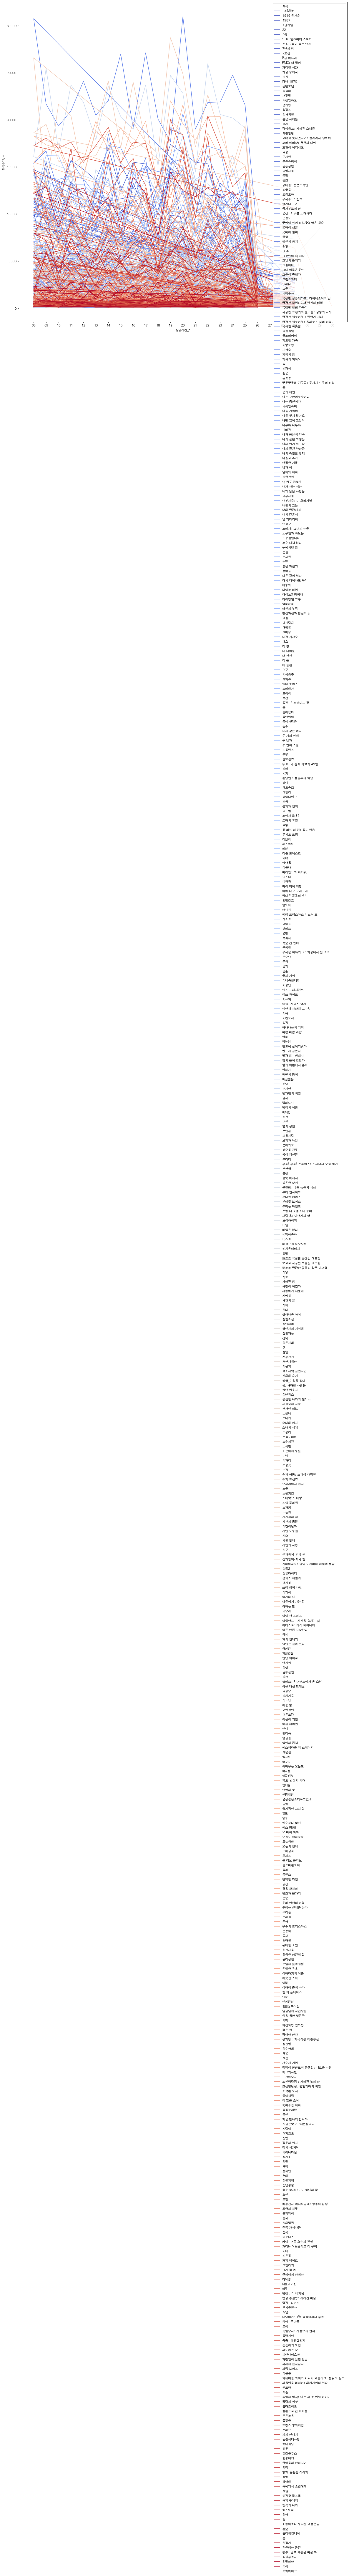

In [75]:
plt.figure(figsize=[20, 20])
sns.lineplot(x='상영시간_h', y='좌석수*횟수', hue='제목', data=by_film, palette='coolwarm')
plt.show()

# '비밀은 없다' 와 '부산행' 비교
비밀은 없다: F-3, 2016-06-23 개봉  
부산행: F-0, 2016-07-20 개봉

In [79]:
films_2 = scale[scale['제목'].isin(['비밀은 없다', '부산행'])]
scale

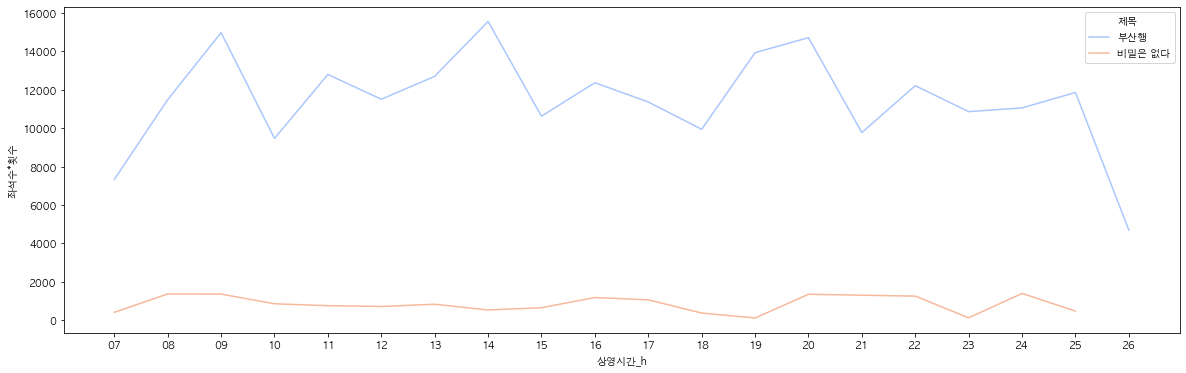

In [80]:
plt.figure(figsize=[20, 6])
sns.lineplot(x='상영시간_h', y='좌석수*횟수', hue='제목', data=films_2, palette='coolwarm')
plt.show()

개봉 첫 주의 스크린수, 스크린점유율, 좌석점유율 참고

상영시간 등급 (CGV 기준) 
* 모닝 06:00 ~ 10:00 -> 4등
* 브런치 10:01 ~ 13:00 -> 3등
* 데이라이트 13:01 ~ 16:00 -> 2등
* 프라임 16:01 ~ 22:00 -> 1등
* 문라이트 22:01 ~ 24:00 -> 3등
* 나이트 24:01 ~ 05:59 -> 4등